In [1]:
%cd ..

/data/baby/Workspace/huyenbk/iai-baby/yolov7


In [2]:
import matplotlib.pyplot as plt
import torch
import cv2
from torchvision import transforms
import numpy as np
from utils.datasets import letterbox
from utils.general import check_img_size, check_requirements, check_imshow, non_max_suppression, scale_coords
from utils.plots import plot_one_box

/home/baby/miniconda3/envs/py38_baby/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
weigths = torch.load('/data/baby/Workspace/huyenbk/iai-baby/yolov7/runs/train/tiny-_2labels_loosen0.3byhead/weights/best.pt')
model = weigths['model']
model = model.half().to(device)
_ = model.eval()

(800, 1280, 3)


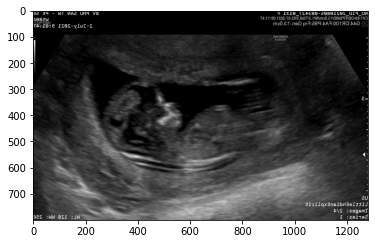

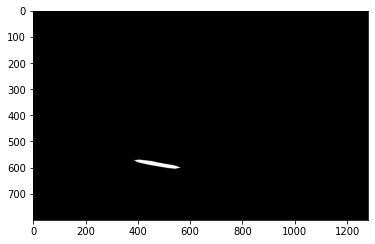

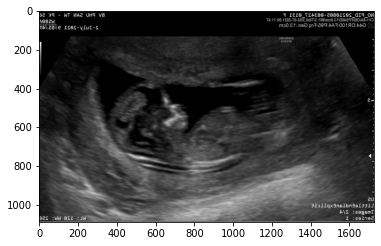

torch.Size([1, 3, 1088, 1728])
(800, 1280, 3)


In [22]:
%matplotlib inline
image = cv2.imread('/data/baby/Workspace/huyenbk/iai-baby/data/baby/test/images/1B_0001_1.png')  # 504x378 image
label = cv2.imread('/data/baby/Workspace/huyenbk/iai-baby/data/baby/test/label/1B_0001_1.png')  # 504x378 label
# plt.figure(figsize=(10, 10))
# plt.axis('off')
print(image.shape)
plt.imshow(image[:,:,[2,1,0]])
plt.show()
im0_ = image.copy()
plt.imshow(label)
plt.show()
image = letterbox(image, 1728, stride=64, auto=True)[0]
image_ = image.copy()
plt.imshow(image_[:,:,[2,1,0]])
plt.show()
image = transforms.ToTensor()(image)
image = torch.tensor(np.array([image.numpy()]))
image = image.to(device)
image = image.half()

output = model(image)
print(image.shape)
print(im0_.shape)


torch.Size([1, 115668, 7])
2


True

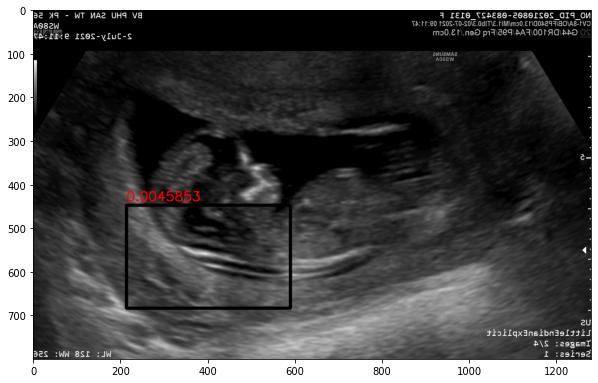

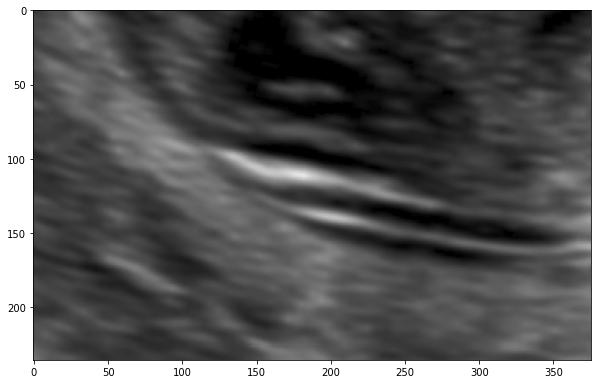

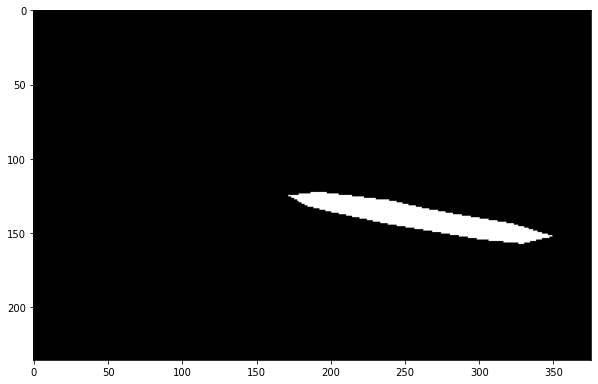

In [23]:
im0 = im0_.copy()
output[1][0][0, 0, :, :, 4].sigmoid().detach().cpu().numpy()
print(output[0].shape)
pred = non_max_suppression(output[0], 1e-3*3, 0.05, agnostic=False)
# print(pred)
s = ''
for i, det in enumerate(pred):
    print(len(det))
    det[:, :4] = scale_coords(image.shape[2:], det[:, :4], im0.shape).round()
    for i,(*xyxy, conf, cls) in enumerate(det):
        # print(xyxy[0].detach().cpu().numpy(), conf)
        plot_one_box(xyxy, im0 , color=(0,0,(i*113)%255),line_thickness=5)
        # draw conf and cls on im0 using cv2
        cv2.putText(im0, f'{conf:.7f}', (int(xyxy[0].detach().cpu().numpy()), int(xyxy[1].detach().cpu().numpy())-10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
        break
# print(s)
plt.figure(figsize=(10, 10))
# plt.axis('off')
plt.imshow(im0[:,:,[2,1,0]])

x1, y1, x2, y2 = int(xyxy[0].detach().cpu().numpy()), int(xyxy[1].detach().cpu().numpy()), int(xyxy[2].detach().cpu().numpy()), int(xyxy[3].detach().cpu().numpy())
#turn all pixels outside the bounding box to black
pred_img=im0_[y1:y2, x1:x2, :]
target_img=label[y1:y2, x1:x2, :]
# im0[0:y1, :, :] = 0
plt.figure(figsize=(10, 10))
# plt.axis('off')
plt.imshow(pred_img[:,:,[2,1,0]])
# save image
cv2.imwrite('/data/baby/Workspace/huyenbk/Nuchal-Translucency-Measurement/iai-baby/data/inference/infer.png', pred_img)

plt.figure(figsize=(10, 10))
# plt.axis('off')
plt.imshow(target_img[:,:,[2,1,0]])
# save image
cv2.imwrite('/data/baby/Workspace/huyenbk/Nuchal-Translucency-Measurement/iai-baby/data/inference/target.png', target_img)
